## Tim en Jelle's notebook voor PCA
Welkom

In [1]:
# just a personal script to change the directory to the right one
import os
os.chdir(r'C:\Users\20223192\OneDrive - TU Eindhoven\Documents\Advanced programming\8CC00-groep-9')
# current directory
print(os.getcwd())

C:\Users\20223192\OneDrive - TU Eindhoven\Documents\Advanced programming\8CC00-groep-9


In [2]:
# imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
# load data from csv
data = pd.read_csv('tested_molecules_with_descriptors.csv')
data.head()

,SMILES,PKM2_inhibition,ERK2_inhibition,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,C=C(C)c1nc(N)nc(N)n1,0,0,5.313889,5.313889,0.120833,0.120833,0.592228,9.545455,151.173,...,0,0,0,0,0,0,0,0,0,0
1,C=C(Cl)COc1ccc2c(C)cc(=O)oc2c1,0,0,11.238954,11.238954,0.225308,-0.366756,0.785414,10.470588,250.681,...,0,0,0,0,0,0,0,0,0,0
2,C=CCNC(=O)CCCC(=O)NCC=C,0,0,11.090706,11.090706,0.049610,-0.049610,0.581062,9.066667,210.277,...,0,0,0,0,0,0,0,0,0,0
3,C=CCOn1c(=O)c(C)[n+]([O-])c2ccccc21,0,0,11.892238,11.892238,0.076632,-0.457824,0.441090,10.411765,232.239,...,0,0,0,0,0,0,0,0,0,0
4,C=CCn1cc(Cl)c(=O)n(CC=C)c1=O,0,0,11.693580,11.693580,0.012315,-0.498260,0.720343,9.933333,226.663,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Separate the molecular descriptors from the inhibition labels and SMILES
df_descriptors = data[['PKM2_inhibition', 'ERK2_inhibition']]
df_data= data.drop(columns=['PKM2_inhibition', 'ERK2_inhibition', 'SMILES'])
df_descriptors.head()

,PKM2_inhibition,ERK2_inhibition
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [7]:
# Identify columns with zero variance (have no discriminatory information)
zero_variance_columns = df_data.columns[df_data.nunique() <= 1]

# Print or remove these columns
print("Columns with zero variance:", zero_variance_columns)
df_data = df_data.drop(columns=zero_variance_columns)

Columns with zero variance: Index(['NumRadicalElectrons', 'SMR_VSA8', 'SlogP_VSA9', 'EState_VSA11',
       'fr_HOCCN', 'fr_SH', 'fr_aldehyde', 'fr_azide', 'fr_azo',
       'fr_benzodiazepine', 'fr_diazo', 'fr_epoxide', 'fr_hdrzine',
       'fr_hdrzone', 'fr_isocyan', 'fr_isothiocyan', 'fr_nitro_arom_nonortho',
       'fr_nitroso', 'fr_phos_acid', 'fr_phos_ester', 'fr_prisulfonamd',
       'fr_term_acetylene', 'fr_thiocyan'],
      dtype='object')


In [8]:
# check if descriptors are normally distributed 
from scipy.stats import shapiro

# Initialize a counter for normally distributed columns
num_norm_columns = 0
alpha = 0.05
# Iterate over each column in df_data
for column in df_data.columns:
    # Perform Shapiro-Wilk test for normality
    stat, p = shapiro(df_data[column])
    
    # Check if the p-value is greater than the significance level (alpha)
    if p > alpha:
        num_norm_columns += 1

# Calculate the percentage of normally distributed columns
percentage_norm_columns = (num_norm_columns / len(df_data.columns)) * 100

percentage_norm_columns

0.0

In [22]:
# data is not normally distributed, so we need to scale it, we will use MinMaxScaler
# # Standardize the features by scaling them to have mean 0 and variance 1
scalerstandard = StandardScaler()
df_normal = scalerstandard.fit_transform(df_data)
# write scaled data to a new csv file
df_out = pd.concat([df_descriptors, pd.DataFrame(df_normal, columns=df_data.columns)], axis=1)
df_out.to_csv('normal_tested.csv', index=False)

In [16]:
scalerminmax = MinMaxScaler()
df_scaled = scalerminmax.fit_transform(df_data)

<AxesSubplot:>

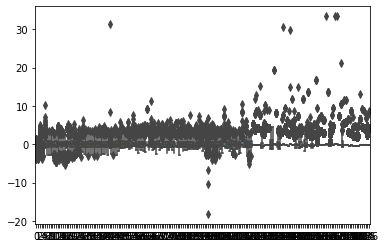

In [15]:
import seaborn as sns
sns.boxplot(data=df_scaled)

In [21]:
# write scaled data to a new csv file
df_out = pd.concat([df_descriptors, pd.DataFrame(df_scaled, columns=df_data.columns)], axis=1)
df_out.to_csv('scaled_tested.csv', index=False)

In [9]:
# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

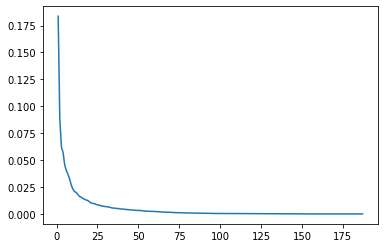

In [10]:
# explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# visualize explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio)

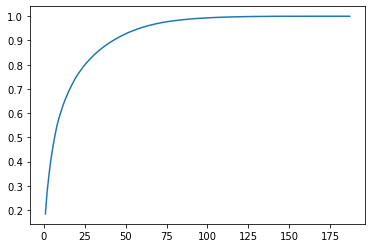

In [11]:
# Cumulative explained variance
cumulative_explained_variance = explained_variance_ratio.cumsum()
# visualize cumulative explained variance
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance)


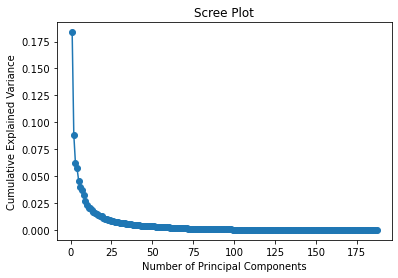

In [12]:


# Create the scree plot
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()
# elbow around 10 components

In [13]:
# keep 90% of the variance
num_components = (cumulative_explained_variance < 0.9).sum() + 1
print("Number of components that explain 90% of the variance:", num_components)
# Apply PCA with the number of components that explain 90% of the variance
pca = PCA(n_components=43) # to fit model
# pca = PCA(n_components=num_components)
df_pca = pca.fit_transform(df_scaled)

Number of components that explain 90% of the variance: 43


In [29]:
# # add the SMILES and inhibition labels back to the PCA data
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(num_components)])
# df_pca = pd.concat([df_pca, df_descriptors], axis=1)
# df_pca.drop(columns=['PKM2_inhibition', 'ERK2_inhibition'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43
0,-2.309637,0.110012,-0.167813,0.415623,-0.708683,-0.228997,0.489269,0.502498,0.275613,0.162138,...,0.140005,0.070864,0.193990,-0.053719,0.081314,0.306587,0.081680,0.077687,0.245433,-0.333385
1,-1.480759,0.071782,-0.362191,0.134438,0.060655,0.418065,-0.170571,-0.134414,-0.272859,0.036371,...,0.215343,0.158601,0.108960,0.021331,-0.016010,0.206711,-0.072850,0.018295,-0.111761,-0.116047
2,-1.339915,-0.732580,-0.292048,-0.000750,-0.335781,-0.633833,0.249672,-0.172020,0.593949,-0.902172,...,-0.019674,0.223052,0.191128,-0.104465,0.082362,0.061433,0.074649,0.317250,-0.102799,0.061982
3,-1.308999,0.064899,-0.297213,0.293516,0.022698,-0.197053,-0.325017,0.276722,-0.198555,-0.193847,...,0.109671,0.393061,0.061283,0.103305,0.093449,0.115827,-0.112678,0.026415,-0.147025,0.025286
4,-1.689393,0.044651,-0.294211,-0.450915,-0.044921,-0.209569,-0.037211,0.018397,-0.407774,-0.437438,...,-0.137639,0.190854,0.171636,0.118504,-0.044707,0.054688,-0.039783,0.365083,0.018626,-0.113657


Text(0, 0.5, 'PC2')

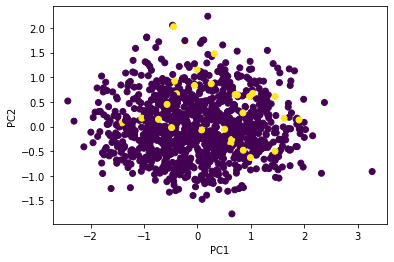

In [19]:
# # plot the first two components
# plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_descriptors['PKM2_inhibition'])
# plt.xlabel('PC1')
# plt.ylabel('PC2')

Text(0, 0.5, 'PC2')

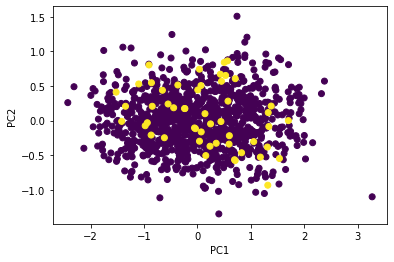

In [25]:
# # plot the first two components
# plt.scatter(df_pca['PC1'], df_pca['PC7'], c=df_descriptors['ERK2_inhibition'])
# plt.xlabel('PC1')
# plt.ylabel('PC2')

In [30]:
# save to csv
df_pca.to_csv('PCA_data_untested.csv', index=False)